## Image Classification : 
with the help of Supervised Algorithms , we are going to classify the handwritten digit images from sklearn MNIST datasets.(multiclass)

### 1. MNIST Dataset:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#importing dataset from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
#features
mnist.data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
#target (0-9) - but the dataset values are unordered
mnist.target


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
#trying to sort the features and labels in ascending order
def sort_digits(mnist):
    reorder_train = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[0:60000])]))[:,1]
    #return reorder_train
    reorder_test = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[60000:])]))[:,1]
    #return reorder_test
    mnist.data[0:60000]   = mnist.data[reorder_train]
    mnist.target[0:60000] = mnist.target[reorder_train]
    mnist.data[60000:]    = mnist.data[reorder_test+60000]
    mnist.target[60000:]  = mnist.target[reorder_test+60000]

In [8]:
mnist.target = mnist.target.astype(np.int8)
sort_digits(mnist)

In [9]:
mnist.target

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [10]:
#sorted features and target
X = mnist.data
y = mnist.target

In [11]:
#70000 images and 784 features (28*28)pixels
X.shape

(70000, 784)

In [12]:
#target from 0 to 9
y.shape

(70000,)

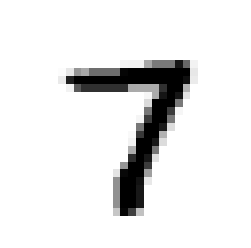

In [51]:
#tryingg to visualize the single digit from the data
single_digit = X[46000]
plt.imshow(single_digit.reshape(28,28) , cmap = mpl.cm.binary , interpolation = 'nearest')
plt.axis('off')
plt.show()

In [52]:
#checking the target value
y[46000]

7

In [53]:
#plotting 100 images from the dataset
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    


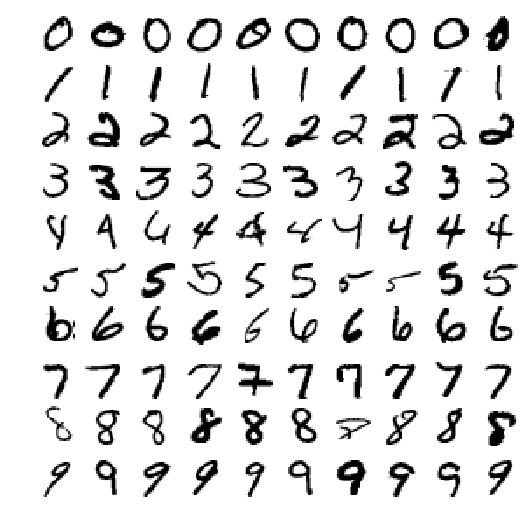

In [54]:
plt.figure(figsize = (9,9))
example_images = np.r_[X[:12000:600],X[13000:30600:600],X[30600:60000:590]]
plot_digits(example_images,images_per_row = 10)
plt.show()

In [55]:
#Splitting datset as train and test (directly)
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [56]:
#suffling tose training data (to get a random instances)
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [57]:
#shuffled training target
y_train

array([0, 0, 1, ..., 1, 7, 8], dtype=int8)

## Binary classifier :
Using SGD classifier ,       
First solving the problem in  a simple manner , if we give a number say 7 ,then it classifies and tells if this number 7(True) or not 7(False)

In [58]:
#True - class 7 ,False - class not7
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [59]:
y_train_7

array([False, False, False, ..., False,  True, False])

In [22]:
#modelling
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42,max_iter = 5,tol = -np.inf)
sgd_clf.fit(X_train,y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
#predicting with the single_digit
single_digit = X[46000]
sgd_clf.predict([single_digit])

array([ True])

The model predicts the value as 7 correctly

In [24]:
#using cross_validation techniques to get accuracy
from sklearn.model_selection import cross_val_score
y_scores = cross_val_score(sgd_clf , X_train,y_train_7,cv=3,scoring='accuracy')
y_scores

array([0.98040098, 0.9718    , 0.98079904])

In [25]:
#without using cross_val_score()
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

kfolds = StratifiedKFold(n_splits = 3,random_state=42)

for train_index,test_index in kfolds.split(X_train,y_train_7):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_7[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_7[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    


0.9804009799510025
0.9718
0.9807990399519976


better way for the performance measuer for class predictions is confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

#for getting confusion matrix , we need a predictions for the training data not scores.instead of cross_val_score()
#we use cross_val_predict ..it returns the predicted values 
from sklearn.model_selection import cross_val_predict
y_scores_pred = cross_val_predict(sgd_clf , X_train,y_train_7,cv=3)

In [27]:
y_scores_pred

array([False, False, False, ..., False, False, False])

In [28]:
#now performing confusion matrix
cm  = confusion_matrix(y_train_7,y_scores_pred)
cm

array([[53083,   652],
       [  688,  5577]], dtype=int64)

In [29]:
#here,
print('correctly classified :-')
print('True positive (class 7) : ',cm[1][1])
print('True Negative (class not7) :',cm[0][0])
print()
print('wrongly classified (wc) :-')
print('False positive (wc as class 7) :',cm[0][1])
print('False Negative (wc as class not7) :',cm[1][0])

correctly classified :-
True positive (class 7) :  5577
True Negative (class not7) : 53083

wrongly classified (wc) :-
False positive (wc as class 7) : 652
False Negative (wc as class not7) : 688


In [30]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [31]:
#precision (positive accuracy)
precision = TP/(TP+FP)
precision

0.8953283030984106

In [32]:
#recall 
recall = TP/(FN+TP)
recall

0.8901835594573024

In [33]:
from sklearn.metrics import precision_score,recall_score
precision = precision_score(y_train_7,y_scores_pred)
recall = recall_score(y_train_7,y_scores_pred)

In [34]:
print(precision)
print(recall)

0.8953283030984106
0.8901835594573024


In [35]:
#dcision fuction (precision_recall_trsdeoff) 
single_digit = X[35500]
y_scores = sgd_clf.decision_function([single_digit])
y_scores #-ve becoz its false

array([-806764.58911317])

In [36]:
y_scores = cross_val_predict(sgd_clf , X_train,y_train_7,cv=3,method = 'decision_function')

In [37]:
y_scores

array([ -119072.75833666,  -244534.86168303, -1335839.07971936, ...,
        -812443.4871815 ,  -559824.18607307,  -959293.59961707])

In [38]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_7,y_scores)

In [39]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,label = label)
    plt.plot([0,1],[0,1],'g--')
    plt.axis([0,1,0,1])
    
    plt.xlabel('FalsePositiveRate')
    plt.ylabel('TruePositiveRate')
    

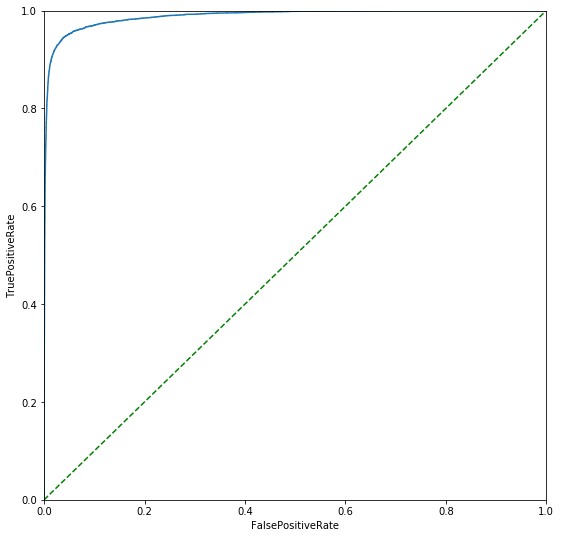

In [40]:
plt.figure(figsize = (9,9))
plot_roc_curve(fpr,tpr)
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7,y_scores)

0.9883299105130844

In [42]:
#performing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 10,random_state = 42)

#instead of decision fuction , we use predict_proba in random forest
y_scores_forest1 = cross_val_predict(rnd_clf , X_train,y_train_7,cv = 3,method = 'predict_proba')

In [43]:
y_scores_forest = y_scores_forest1[:,1]
y_scores_forest

array([0.2, 0. , 0. , ..., 0. , 0. , 0. ])

In [44]:
fpr_forest , tpr_forest , thresholds_forest = roc_curve(y_train_7,y_scores_forest)

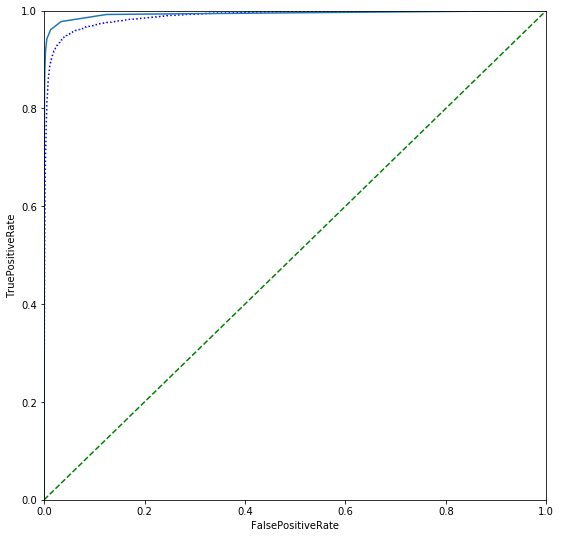

In [45]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr,'b:',label = 'SGD')
plot_roc_curve(fpr_forest,tpr_forest, 'RandomForest')
plt.show()

In [46]:
#accuracy for random forest
roc_auc_score(y_train_7 , y_scores_forest)

0.9934248775303651

In [47]:
#K nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 7)
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

### Multiclass Classifier:
(0-9)
One vs One(OvO) - classifies same as binary classifier as we did before (0-detector , 1-detector , 2-detector so on...)      
One vs All(OvA) - Classifies as binary Classifier as comparing btw 0's and 1's ,0's and 2's ,1's and 2's so on....                    
OvA = N * (N-1)/2  .ie,. MNIST cntains 45 classifiers.

In [60]:
#instead of y_train_7 , we use y_train(completely) to train the SGD model
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
sgd_clf.predict([single_digit])

array([7], dtype=int8)

In [67]:
score = sgd_clf.decision_function([single_digit])
score

array([[ -640817.7907804 ,  -649321.13756927,  -441317.70295688,
         -376347.52316552,  -649602.02194096,  -382366.99348586,
        -1046954.61254289,   342793.95316989,  -257959.78780227,
         -205816.89739025]])

In [68]:
np.argmax(score)

7

In [72]:
#No.of target classes
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [73]:
#random forest Classifier
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
rnd_clf.predict([single_digit])

array([7], dtype=int8)

In [75]:
rnd_clf.predict_proba([single_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [80]:
y_score_rnd = cross_val_score(rnd_clf,X_train,y_train,cv=3)
y_score_rnd

array([0.94311138, 0.94174709, 0.93964095])

In [82]:
#By scaling the features (accuracy will somewhat increase)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [85]:
#after scaling the features
cross_val_score(rnd_clf,X_train_scaled,y_train,cv=3)

array([0.94306139, 0.94159708, 0.93939091])

In [86]:
#confusion_matrix using SGD Classifier
y_train_pred = cross_val_predict(sgd_clf , X_train_scaled , y_train,cv=3)
cm = confusion_matrix(y_train , y_train_pred)

In [90]:
#for multiclass
cm

array([[5730,    2,   22,    8,   11,   45,   50,    9,   43,    3],
       [   1, 6472,   42,   27,    6,   43,    6,   12,  123,   10],
       [  53,   36, 5332,   92,   84,   23,   92,   63,  168,   15],
       [  45,   44,  137, 5344,    2,  228,   39,   53,  148,   91],
       [  21,   27,   34,    8, 5387,    8,   49,   32,   80,  196],
       [  74,   44,   33,  184,   83, 4552,  111,   30,  208,  102],
       [  35,   25,   51,    1,   41,   89, 5621,    3,   52,    0],
       [  23,   20,   73,   25,   49,    9,    9, 5809,   20,  228],
       [  51,  151,   66,  139,   16,  147,   60,   23, 5064,  134],
       [  41,   31,   32,   87,  185,   29,    3,  205,   88, 5248]],
      dtype=int64)

## test Evaluation

In [94]:
#Unseen Dataset
y_pred = sgd_clf.predict(X_test)

In [95]:
confusion_matrix(y_test,y_pred)

array([[ 914,    0,    5,    3,    0,   29,   11,    7,    9,    2],
       [   0, 1103,    4,    0,    1,    2,    4,    2,   16,    3],
       [   3,    6,  903,   18,    5,    9,   18,   19,   46,    5],
       [   6,    2,   29,  711,    0,  142,    1,   24,   82,   13],
       [   2,    7,    5,    5,  743,    8,   15,   35,   44,  118],
       [   9,    3,    7,   12,    0,  781,    5,   14,   48,   13],
       [   6,    3,    8,    0,    3,   33,  888,    6,   10,    1],
       [   0,    5,   13,    5,    0,    2,    1,  964,   16,   22],
       [   7,    6,   13,   15,    4,   45,    7,   22,  842,   13],
       [   5,    4,    0,    6,    2,   10,    2,   98,   31,  851]],
      dtype=int64)